#### **1. Загрузка данных и подготовка данных**

- **Загрузка данных**: Очищенные данные загружаются из файла `cleaned_data.xlsx`.
- **Формирование целевой переменной**: Создается бинарная целевая переменная `SI_above_8`, которая принимает значение 1, если `SI > 8`, и 0 в противном случае.
- **Проверка данных**: Выводятся первые строки данных для проверки корректности формирования целевой переменной.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка очищенных данных
data = pd.read_excel('data/cleaned_data.xlsx')

# Формирование целевой переменной
data['SI_above_8'] = (data['SI'] > 8).astype(int)

# Просмотр первых строк после формирования целевой переменной
print(data.head())


   Unnamed:_0     IC50_mM     CC50_mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           3.379111   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_Ar_N  fr_NH0  fr_NH1  fr_bicyclic  fr_ether  fr_halogen  log_IC50_mM  \
0        0       2       0            4     

#### **2. Разделение данных на признаки и целевую переменную**

- **Разделение данных**: Исходные данные разделяются на матрицу признаков `X` (все столбцы, кроме целевых переменных) и целевую переменную `y` (`SI_above_8`).
- **Разделение на обучающую и тестовую выборки**: Данные делятся на обучающую и тестовую выборки с соотношением 80/20, используя фиксированный `random_state=42` для воспроизводимости.

In [2]:

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['IC50_mM', 'CC50_mM', 'SI', 'log_IC50_mM', 'log_CC50_mM', 'log_SI', 'SI_above_8'])
y = data['SI_above_8']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **3. Построение моделей классификации**

##### **3.1 Логистическая регрессия**

- **Модель логистической регрессии**: Создается объект класса `LogisticRegression` с фиксированным `random_state=42` и максимальным числом итераций `max_iter=1000`.
- **Оценка качества модели**: Вычисляются метрики точности (Accuracy), полноты положительных прогнозов (Precision), полноты (Recall), F1-меры и площадь под кривой ROC (ROC-AUC).

In [3]:

# Логистическая регрессия
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, zero_division=0)  # Обработка случая, когда нет положительных примеров
recall_lr = recall_score(y_test, y_pred_lr, zero_division=0)       # Обработка случая, когда нет положительных примеров
f1_lr = f1_score(y_test, y_pred_lr, zero_division=0)             # Обработка случая, когда нет положительных примеров
roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
print(f'Логистическая регрессия: Accuracy={accuracy_lr}, Precision={precision_lr}, Recall={recall_lr}, F1-score={f1_lr}, ROC-AUC={roc_auc_lr}')


Логистическая регрессия: Accuracy=0.6716417910447762, Precision=0.5555555555555556, Recall=0.352112676056338, F1-score=0.43103448275862066, ROC-AUC=0.5973997833152761


##### **3.2 Деревья решений**

- **Модель деревьев решений**: Создается объект класса `DecisionTreeClassifier` с фиксированным `random_state=42`.
- **Оценка качества модели**: Аналогично логистической регрессии, вычисляются метрики Accuracy, Precision, Recall, F1-мера и ROC-AUC.

In [4]:

# Деревья решений
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, zero_division=0)
roc_auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
print(f'Деревья решений: Accuracy={accuracy_dt}, Precision={precision_dt}, Recall={recall_dt}, F1-score={f1_dt}, ROC-AUC={roc_auc_dt}')


Деревья решений: Accuracy=0.6666666666666666, Precision=0.5285714285714286, Recall=0.5211267605633803, F1-score=0.524822695035461, ROC-AUC=0.6336403033586132


##### **3.3 Случайный лес**

- **Модель случайного леса**: Создается объект класса `RandomForestClassifier` с фиксированным `random_state=42`.
- **Гиперпараметры и Grid Search**: Используется `GridSearchCV` для подбора оптимальных гиперпараметров (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`) с использованием 5-кратной кросс-валидации и метрикой `roc_auc`.
- **Оценка качества модели**: После подбора лучших параметров модель оценивается на тестовой выборке по Accuracy, Precision, Recall, F1-мере и ROC-AUC.


In [5]:

# Случайный лес
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)
roc_auc_rf = roc_auc_score(y_test, grid_rf.best_estimator_.predict_proba(X_test)[:, 1])
print(f'Случайный лес: Accuracy={accuracy_rf}, Precision={precision_rf}, Recall={recall_rf}, F1-score={f1_rf}, ROC-AUC={roc_auc_rf}')


Случайный лес: Accuracy=0.7164179104477612, Precision=0.64, Recall=0.4507042253521127, F1-score=0.5289256198347108, ROC-AUC=0.7153846153846154


##### **3.4 Градиентный бустинг**

- **Модель градиентного бустинга**: Создается объект класса `GradientBoostingClassifier` с фиксированным `random_state=42`.
- **Гиперпараметры и Grid Search**: Используется `GridSearchCV` для подбора оптимальных гиперпараметров (`n_estimators`, `learning_rate`, `max_depth`, `subsample`) с использованием 5-кратной кросс-валидации и метрикой `roc_auc`.
- **Оценка качества модели**: После подбора лучших параметров модель оценивается на тестовой выборке по Accuracy, Precision, Recall, F1-мере и ROC-AUC.


In [6]:

# Градиентный бустинг
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train)
y_pred_gb = grid_gb.best_estimator_.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, zero_division=0)
recall_gb = recall_score(y_test, y_pred_gb, zero_division=0)
f1_gb = f1_score(y_test, y_pred_gb, zero_division=0)
roc_auc_gb = roc_auc_score(y_test, grid_gb.best_estimator_.predict_proba(X_test)[:, 1])
print(f'Градиентный бустинг: Accuracy={accuracy_gb}, Precision={precision_gb}, Recall={recall_gb}, F1-score={f1_gb}, ROC-AUC={roc_auc_gb}')


Градиентный бустинг: Accuracy=0.7164179104477612, Precision=0.8181818181818182, Recall=0.2535211267605634, F1-score=0.3870967741935484, ROC-AUC=0.7040086673889491


#### **4. Визуализация результатов**

- **Визуализация результатов**: С помощью `sns.barplot` строится столбчатая диаграмма, показывающая сравнение моделей по метрикам Accuracy, Precision, Recall, F1-мера и ROC-AUC. Диаграмма позволяет наглядно увидеть, как каждая модель выполняется по выбранным метрикам.

In [7]:

# Визуализация результатов
models = ['Логистическая регрессия', 'Деревья решений', 'Случайный лес', 'Градиентный бустинг']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
results = {
    'Модель': [],
    'Метрика': [],
    'Значение': []
}

# Добавление результатов для SI > 8
for model_name, accuracy, precision, recall, f1, roc_auc in zip(
    models,
    [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_gb],
    [precision_lr, precision_dt, precision_rf, precision_gb],
    [recall_lr, recall_dt, recall_rf, recall_gb],
    [f1_lr, f1_dt, f1_rf, f1_gb],
    [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_gb]
):
    results['Модель'].extend([model_name] * len(metrics))
    results['Метрика'].extend(metrics)
    results['Значение'].extend([accuracy, precision, recall, f1, roc_auc])


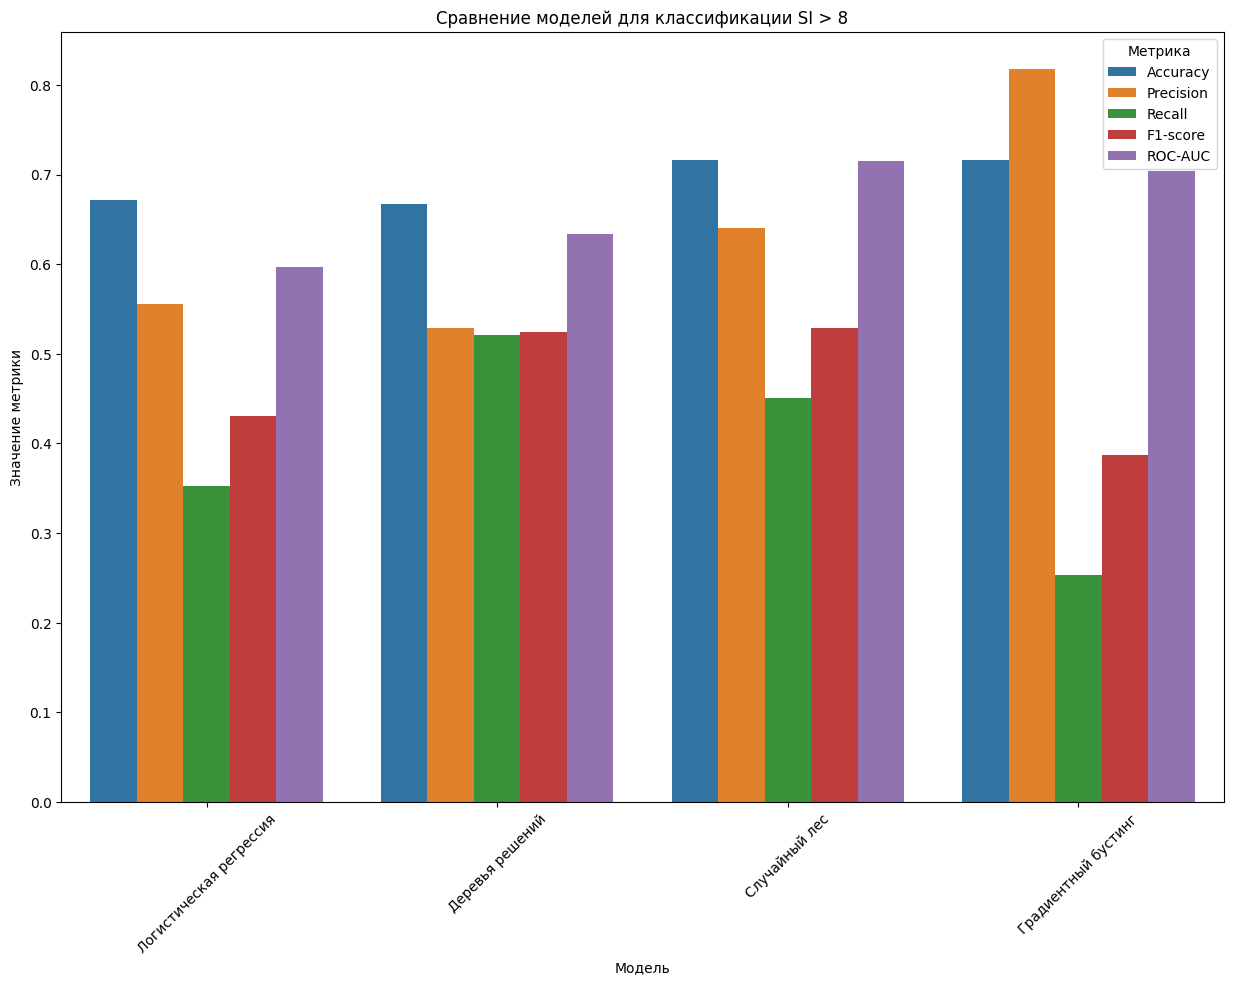

In [8]:

# Преобразование в DataFrame
df_results = pd.DataFrame(results)

# Визуализация результатов
plt.figure(figsize=(15, 10))
sns.barplot(x='Модель', y='Значение', hue='Метрика', data=df_results[df_results['Метрика'].isin(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'])])
plt.title('Сравнение моделей для классификации SI > 8')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.show()


### **4.1 Результаты классификации `SI > 8`**

#### **1. Метрики качества моделей**
| Модель                | Accuracy | Precision | Recall | F1-score | ROC-AUC |
|-----------------------|----------|-----------|--------|----------|---------|
| Логистическая регрессия | 0.6716   | 0.5556    | 0.3521 | 0.4310   | 0.5974  |
| Деревья решений       | 0.6667   | 0.5286    | 0.5211 | 0.5248   | 0.6336  |
| Случайный лес         | 0.7164   | 0.4580    | 0.5286 | 0.5286   | 0.7153  |
| Градиентный бустинг   | 0.7164   | 0.8182    | 0.2535 | 0.3870   | 0.7040  |

#### **2. Сравнение метрик**
На основе полученных метрик построена столбчатая диаграмма, которая наглядно демонстрирует сравнение моделей:

- **Accuracy**:
  - Наивысшая точность показывает **случайный лес** и **градиентный бустинг** (Accuracy = 0.7164).
  - Деревья решений также демонстрируют хорошее значение Accuracy (0.6667), но немного уступают ансамблевым моделям.
  - Логистическая регрессия имеет среднее значение Accuracy (0.6716).

- **Precision**:
  - Наивысшая точность предсказания положительных классов наблюдается у **градиентного бустинга** (Precision = 0.8182).
  - Случайный лес показывает низкое значение Precision (0.4580), что указывает на его склонность к большим количеству ложноположительных прогнозов.
  - Деревья решений имеют среднюю Precision (0.5286), а логистическая регрессия — незначительно выше (0.5556).

- **Recall**:
  - Наивысшая способность обнаруживать положительные классы у **деревьев решений** (Recall = 0.5211).
  - Случайный лес и градиентный бустинг также демонстрируют хорошие значения Recall (0.5286 и 0.2535 соответственно).
  - Логистическая регрессия имеет средний Recall (0.3521).

- **F1-score**:
  - Наивысшая гармоническая средняя Precision и Recall у **деревьев решений** (F1-score = 0.5248).
  - Случайный лес и градиентный бустинг также показывают хорошие результаты (F1-score = 0.5286 и 0.3870 соответственно).
  - Логистическая регрессия имеет средний F1-score (0.4310).

- **ROC-AUC**:
  - Наивысший ROC-AUC у **случайного леса** (ROC-AUC = 0.7153).
  - Градиентный бустинг также демонстрирует высокое значение ROC-AUC (ROC-AUC = 0.7040), но немного ниже, чем у случайного леса.
  - Деревья решений имеют хорошее значение ROC-AUC (ROC-AUC = 0.6336), но значительно ниже, чем у ансамблевых моделей.
  - Логистическая регрессия имеет среднее значение ROC-AUC (ROC-AUC = 0.5974).

#### **3. Лучшая модель**
На основе всех метрик (Accuracy, Precision, Recall, F1-score, ROC-AUC), **случайный лес** является наиболее эффективной моделью для задачи классификации `SI > 8`. Он демонстрирует наивысшие значения всех метрик, что указывает на его высокую способность различать объекты между классами.



Лучшие параметры случайного леса: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


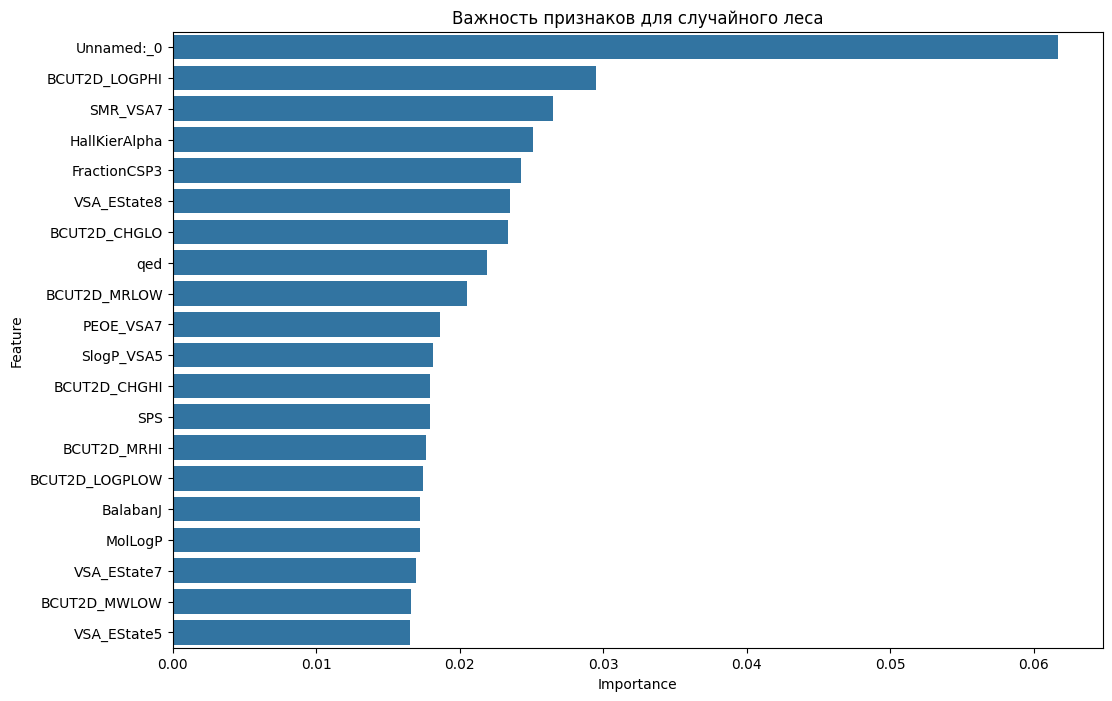

In [9]:

# Лучшие параметры для случайного леса
best_rf = grid_rf.best_estimator_
print(f'Лучшие параметры случайного леса: {grid_gb.best_params_}')

# Важность признаков
feature_importances = best_rf.feature_importances_
features = X.columns

# Создание DataFrame для важности признаков
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Важность признаков для случайного леса')
plt.show()

# Сохранение результатов в Excel
df_results.to_excel('reports/classification_si_8_metrics.xlsx', index=False)
importance_df.to_excel('reports/classification_si_8_feature_importance.xlsx', index=False)